### expand notebook width

In [ ]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
""")) 

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 500)

In [ ]:
import seaborn as sns
sns.set_style(style='darkgrid') 

### Supress Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### plot correlation

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
data = np.array([[1201, 100, 7534], [0.2, 1.2, 0.7]])
print(data.shape)

(2, 3)


## two y-values

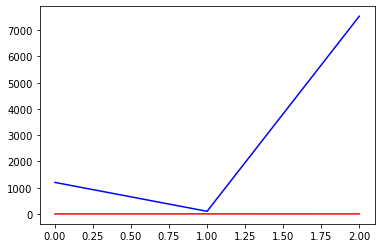

In [35]:

t1 = np.arange(0, 3)

plt.plot(t1, data[0,:], 'b-', t1, data[1,:], 'r-')

plt.savefig('image.png')

## Two y-axis

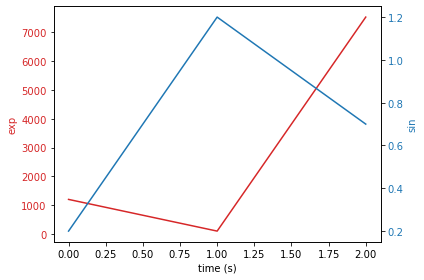

In [36]:
# Create some mock data
t = t1
data1 = data[0,:]
data2 = data[1,:]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()